In [14]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from tabulate import tabulate
from pathlib import Path
import matplotlib
%matplotlib inline

In [15]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [16]:
PLAID_CLIENT_ID = os.getenv('PLAID_API_KEY')
PLAID_SECRET = os.getenv('PLAID_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')


# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [17]:
INSTITUTION_ID = "ins_109508"

In [18]:
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment=PLAID_ENV)

### 2. Generate a public token

In [19]:
# Select an institution for processing
INSTITUTION_ID = "ins_109508"

# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])




### 3. Exchange the public token for an access token

In [20]:
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [21]:
# Get accounts associated with institution
client.Accounts.get(access_token)

{'accounts': [{'account_id': '5eBgNamwVXUnWq8GJNJjSj75DaNevBuZd6kba',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'Jlq5zWDGbyCrgG3J8k8aTQg1JVMrm3tdJnz1V',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'k96qaoWemRIxlyXaG3Gju3jVaJyqW4CWpmMqM',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [22]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)[PLAID_PRODUCTS]


### 2. Print the categories for each transaction

In [23]:
# Print JSON output
#pretty_print_response(transaction_response[PLAID_PRODUCTS][:2])
categories = set()
for transaction in transaction_response:
    categories.update(transaction['category'])
categories

{'Airlines and Aviation Services',
 'Coffee Shop',
 'Credit',
 'Credit Card',
 'Debit',
 'Deposit',
 'Fast Food',
 'Food and Drink',
 'Gyms and Fitness Centers',
 'Payment',
 'Recreation',
 'Restaurants',
 'Shops',
 'Sporting Goods',
 'Taxi',
 'Transfer',
 'Travel'}

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [24]:
transaction_data_df = pd.DataFrame(transaction_response, columns=['date', 'name', 'amount', 'category'])
transaction_data_df['category'] = transaction_data_df['category'].apply(lambda x: x[0])
transaction_data_df

,date,name,amount,category
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
1,2020-04-15,Uber,5.40,Travel
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.00,Transfer
4,2020-04-13,Touchstone Climbing,78.50,Recreation
5,2020-04-13,United Airlines,-500.00,Travel
6,2020-04-12,McDonald's,12.00,Food and Drink
7,2020-04-12,Starbucks,4.33,Food and Drink
8,2020-04-11,SparkFun,89.40,Food and Drink
9,2020-04-10,INTRST PYMNT,-4.22,Transfer


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [40]:
#Convert the data types to the appropriate types
transaction_data_df['amount'] = transaction_data_df['amount'].astype('float64')
transaction_data_df['date'] = pd.to_datetime(transaction_data_df['date'], infer_datetime_format=True)
transaction_data_df.set_index('date', inplace=True)
transaction_data_df.dtypes

name         object
amount      float64
category     object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [27]:
#Fetch gross income for the year
income_data = client.Income.get(access_token)['income']
income_data
# Previous Year income
print(f"previous_year_income : {income_data['last_year_income_before_tax']}")

# Current Monthly income
print(f"monthly_income = {income_data['income_streams'][0]['monthly_income']}")

#Projected Yearly Income
print(f"projected_yearly_income : {income_data['projected_yearly_income']}")

previous_year_income : 7285
monthly_income = 500
projected_yearly_income : 6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [59]:
# Total Spending per category
total_spending = transaction_data_df.groupby('category').sum().round(2)
total_spending


,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


In [52]:
# Take the Total spending per catergory to Markdown file
print(total_spending.to_csv("Financial_Report.md", sep = "|", index = True))

#output = print(tabulate(total_spending, tablefmt="pipe", headers="keys"))

#with open(Path("Financial_Report.md"), 'x') as outputfile:  
 #   print(output, file=outputfile)

None


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000245D0068A48>],
      dtype=object)

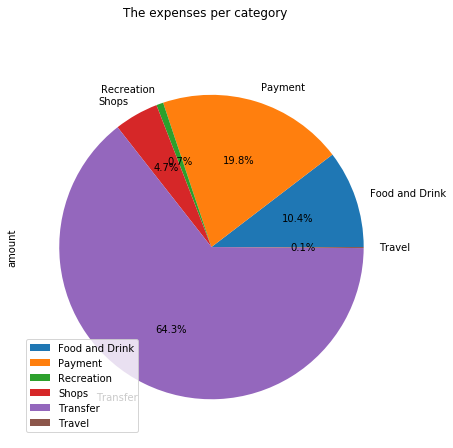

In [55]:
total_spending.plot.pie(figsize=(7,7),subplots=True,title='The expenses per category', autopct='%.1f%%')

[Text(0, 0.5, 'count')]

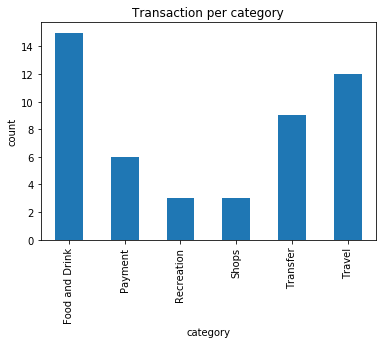

In [68]:
#Generate a bar chart with the number of transactions for each category 
category_count = transaction_data_df.groupby('category').count()[['name']]
category_count.columns = ['count']
ax = category_count.plot.bar(title="Transaction per category", legend=False)
ax.set(ylabel='count')

### Calculate the expenses per month

In [69]:
#calculate expenses per month
Expense_per_month = transaction_data_df.groupby(pd.Grouper(freq='M')).sum()

#convert the date column into date type
Expense_per_month.reset_index(inplace=True)
Expense_per_month['date'] = pd.to_datetime(Expense_per_month['date'], infer_datetime_format=True)
Expense_per_month.set_index('date', inplace=True)

Expense_per_month

,amount
date,
2020-01-31,4084.83
2020-02-29,10145.24
2020-03-31,11145.24
2020-04-30,6560.41


[Text(0, 0.5, 'amount'), Text(0.5, 0, 'month')]

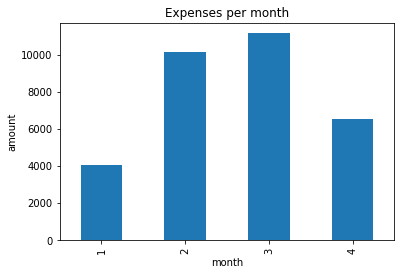

In [49]:
# Plot the bar chart for the expenses per month
ax = Expense_per_month.plot.bar(legend=False, title='Expenses per month')
ax.set_xticklabels(pd.DatetimeIndex(Expense_per_month.index).month)
ax.set(xlabel='month', ylabel='amount')